# Forex (foriegn exchange) predictions using Machine Learning
## Load data

<!-- ![Screen%20Shot%202023-04-16%20at%209.08.07%20PM.png](attachment:Screen%20Shot%202023-04-16%20at%209.08.07%20PM.png -->

<div>
<img src="candlestick.png" width="500"/>
</div>

In [1]:
import pandas as pd
df = pd.read_csv("USDCAD_Candlestick_4_Hour_ASK_05.10.2021-05.12.2022.csv")
df.tail()

,Local time,Open,High,Low,Close,Volume
2393,05.12.2022 06:00:00.000 GMT-0800,1.34242,1.35863,1.34231,1.35785,79103.300000
2394,05.12.2022 10:00:00.000 GMT-0800,1.35786,1.36064,1.35692,1.35922,44078.930000
2395,05.12.2022 14:00:00.000 GMT-0800,1.35923,1.35981,1.35718,1.35831,3836.416752
2396,05.12.2022 18:00:00.000 GMT-0800,1.35831,1.36016,1.35721,1.35861,0.033866
2397,05.12.2022 22:00:00.000 GMT-0800,1.35860,1.36206,1.35824,1.36093,0.039987


## Drop data with zero volume

In [2]:
indexZeros = df[ df['Volume'] == 0 ].index
df.drop(indexZeros , inplace=True)

## Calculate some technical indicators
- ATR: Average True Range is a volatility indicator that provides a measure of price volatility. ATR is not used to indicate the direction of price. Rather, it is a metric used solely to measure volatility, especially volatility caused by price gaps or limit moves. Strong moves, in either direction, are often accompanied by large ranges, or large True Ranges.
- RSI: Relative Strength Index is a momentum indicator that compares the magnitude of recent gains and losses over a specified time period to measure speed and change of price movements of a security. It is primarily used to attempt to identify overbought or oversold conditions in the trading of an asset. The RSI oscillates between 0 and 100. Traditionally, RSI is considered overbought when above 70 and oversold when below 30.
- Midprice: average of bid price and ask price
- SMA: Simple Moving Average is a trend indicator and the classic moving average that is the equally
    weighted average over n periods. SMA usually calculates the average of a selected range of closing prices.  For example, you can find a stock's n-day SMA by adding its closing prices over n days, then dividing that number by n.


In [3]:
import numpy as np
import pandas_ta as ta

df['ATR'] = df.ta.atr(length=20)
df['RSI'] = df.ta.rsi()
df['Average'] = df.ta.midprice(length=1)
df['SMA20'] = ta.sma(df['Close'],length=20)
df['SMA40'] = ta.sma(df['Close'],length=40)
df['SMA80'] = ta.sma(df['Close'],length=80)
df.tail()

,Local time,Open,High,Low,Close,Volume,ATR,RSI,Average,SMA20,SMA40,SMA80
2393,05.12.2022 06:00:00.000 GMT-0800,1.34242,1.35863,1.34231,1.35785,79103.300000,0.005143,65.328530,1.350470,1.345454,1.345959,1.341626
2394,05.12.2022 10:00:00.000 GMT-0800,1.35786,1.36064,1.35692,1.35922,44078.930000,0.005072,66.485634,1.358780,1.345799,1.346624,1.342028
2395,05.12.2022 14:00:00.000 GMT-0800,1.35923,1.35981,1.35718,1.35831,3836.416752,0.004950,64.935436,1.358495,1.346038,1.347169,1.342356
2396,05.12.2022 18:00:00.000 GMT-0800,1.35831,1.36016,1.35721,1.35861,0.033866,0.004850,65.223316,1.358685,1.346541,1.347669,1.342674
2397,05.12.2022 22:00:00.000 GMT-0800,1.35860,1.36206,1.35824,1.36093,0.039987,0.004798,67.448981,1.360150,1.347507,1.348236,1.342999


## Calculate average slope of indicators to get trend of them

In [4]:
from scipy.stats import linregress
def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

backrollingN = 6

df['slopeSMA20'] = df['SMA20'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeSMA40'] = df['SMA40'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeSMA80'] = df['SMA80'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['AverageSlope'] = df['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['RSISlope'] = df['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)
df.tail()

,Local time,Open,High,Low,Close,Volume,ATR,RSI,Average,SMA20,SMA40,SMA80,slopeSMA20,slopeSMA40,slopeSMA80,AverageSlope,RSISlope
2393,05.12.2022 06:00:00.000 GMT-0800,1.34242,1.35863,1.34231,1.35785,79103.300000,0.005143,65.328530,1.350470,1.345454,1.345959,1.341626,-0.000726,0.000239,0.000202,0.000284,2.105077
2394,05.12.2022 10:00:00.000 GMT-0800,1.35786,1.36064,1.35692,1.35922,44078.930000,0.005072,66.485634,1.358780,1.345799,1.346624,1.342028,-0.000426,0.000350,0.000259,0.002939,5.357482
2395,05.12.2022 14:00:00.000 GMT-0800,1.35923,1.35981,1.35718,1.35831,3836.416752,0.004950,64.935436,1.358495,1.346038,1.347169,1.342356,-0.000141,0.000458,0.000312,0.004231,5.644408
2396,05.12.2022 18:00:00.000 GMT-0800,1.35831,1.36016,1.35721,1.35861,0.033866,0.004850,65.223316,1.358685,1.346541,1.347669,1.342674,0.000138,0.000532,0.000347,0.003950,4.588125
2397,05.12.2022 22:00:00.000 GMT-0800,1.35860,1.36206,1.35824,1.36093,0.039987,0.004798,67.448981,1.360150,1.347507,1.348236,1.342999,0.000410,0.000572,0.000356,0.003318,3.051620


## Detect price trend


<!-- ![Screen%20Shot%202023-04-16%20at%208.47.50%20PM.png](attachment:Screen%20Shot%202023-04-16%20at%208.47.50%20PM.png -->

<div>
<img src="SL_TP.png" width="800"/>
</div>

In [5]:
takeProfit = 450*1e-5 
SLTPRatio = 2 
stopLoss = takeProfit / SLTPRatio

def priceTrend(barsupfront, df1):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    trend = [None] * length
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh) 
            if ( (valueOpenLow >= takeProfit) and (valueOpenHigh > (stopLoss)) ):
                trend[line] = 1 # down trend
                break
            elif ( (valueOpenLow < (stopLoss)) and (valueOpenHigh <= takeProfit) ):
                trend[line] = 2 # up trend
                break
            else:
                trend[line] = 0 # no clear trend
            
    return trend

In [6]:
# priceTrend(number of future bars to consider, dataframe)
df['priceTrend'] = priceTrend(16, df)
df['priceTrend'].value_counts()
# df.head()

2.0    1283
0.0     500
Name: priceTrend, dtype: int64

## Splitting covariates and response variable

In [7]:
df=df.dropna()

attributes=['ATR', 'RSI', 'Average', 'SMA20', 'SMA40', 'SMA80', 'slopeSMA20', 'slopeSMA40', 'slopeSMA80', 'AverageSlope', 'RSISlope']
X = df[attributes]
y = df["priceTrend"]

print(X)

           ATR        RSI   Average     SMA20     SMA40     SMA80  slopeSMA20  \
120   0.002786  47.012531  1.235260  1.234534  1.235752  1.242861    0.000036   
121   0.002792  53.909082  1.236075  1.234704  1.235754  1.242570    0.000011   
122   0.002853  59.533982  1.238070  1.234947  1.235818  1.242270    0.000048   
123   0.002787  56.607870  1.238895  1.235133  1.235895  1.241973    0.000105   
124   0.002707  54.997488  1.238220  1.235438  1.235981  1.241678    0.000184   
...        ...        ...       ...       ...       ...       ...         ...   
2363  0.004474  58.274386  1.354550  1.348299  1.342732  1.337840    0.001057   
2364  0.004687  51.401595  1.352460  1.348798  1.342863  1.338113    0.000925   
2365  0.004830  43.658539  1.342170  1.348966  1.342891  1.338289    0.000734   
2366  0.004660  44.089826  1.342075  1.349126  1.342943  1.338490    0.000525   
2367  0.004569  43.332093  1.341870  1.348857  1.342968  1.338683    0.000277   

      slopeSMA40  slopeSMA8

## Splitting data into training set and test set

In [8]:
# note that data is time-series data
train_index = int(0.8 * len(X))
X_train, X_test = X[:train_index], X[train_index:]
y_train, y_test = y[:train_index], y[train_index:]


## Fitting of KNN model

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='kd_tree', leaf_size=30, p=1, metric='minkowski', metric_params=None, n_jobs=1)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## Evaluation of KNN model

In [10]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("KNN Model")
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy test: %.2f%%" % (accuracy_test * 100.0))


# Random Model
pred_test = np.random.choice([0, 1, 2], len(y_pred_test))
accuracy_test = accuracy_score(y_test, pred_test)
print('------------------------')
print("Random Model")
print("Accuracy Gambler: %.2f%%" % (accuracy_test * 100.0))

KNN Model
Accuracy train: 75.57%
Accuracy test: 56.47%
------------------------
Random Model
Accuracy Gambler: 35.88%


##  XGBoost Model

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('XGBoost Model')
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

XGBoost Model
****Train Results****
Accuracy: 100.0000%
****Test Results****
Accuracy: 39.1176%


## Importance of covariates

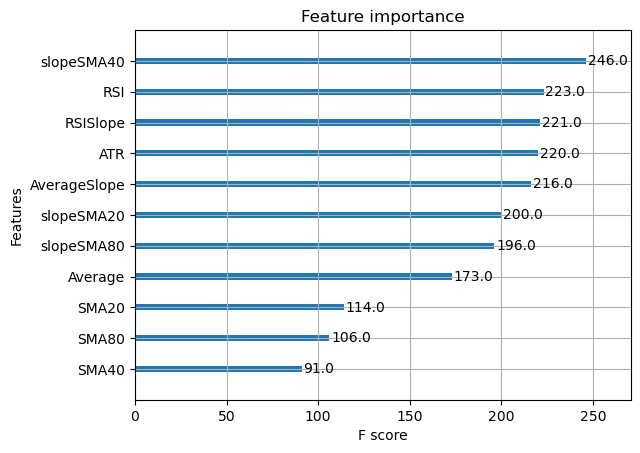

In [13]:
from matplotlib import pyplot
from xgboost import plot_importance

plot_importance(model)
pyplot.show()